<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/PI_BUFFON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-X-P-E-R-I-M-E-N-T-O _ D-E _ L-A _ A-G-U-J-A _ D-E _ B-U-F-F-O-N

Imagina una superficie plana dividida en franjas paralelas por líneas equidistantes entre sí. La distancia entre líneas es igual a la longitud de una aguja que se lanza al azar sobre esta superficie.

Las características del experimento son las siguientes:

* La aguja tiene una longitud conocida $L$.

* Las líneas paralelas están separadas por una distancia $d$, donde $d \leq L$.

* La aguja se lanza al azar sobre la superficie y se registra si cruza alguna línea o no.

El objetivo del experimento es determinar la probabilidad $P$ de que la aguja cruce una de las líneas entre las franjas paralelas.

La fórmula que relaciona la probabilidad $P$ es

$$ P=\frac{2L}{\pi d} $$

Para estimar el valor de $\pi$ , podemos definir un modelo de bernoulli, donde:

 $$ Éxito (X_i = 1): \text{ la aguja cruza una línea en el lanzamiento } i $$
 $$ Fracaso (X_i = 0): \text{ la aguja no cruza una línea en el lanzamiento }i $$

* Sabemos que la media $\mu$ de la distribución de Bernoulli de $X_i$ es P.

$$ E[X_i] = \mu = 1(P) + 0(1-P) = P$$

* Y la varianza

$$ V[X_i] = \sigma^2 = P - P^2 = P(1-P)$$

Ademas sabemos que:
$$ P = \frac{2L}{\pi d} ⟹ \pi = \frac{2L}{Pd}$$

Para aplicar el Teorema de Chebyshev y determinar el tamaño de la muestra necesaria para estimar π con una precisión deseada en el Experimento de la aguja de Buffon, definiremos:

* La presición deseada de $\epsilon$, con una probabilidad de fallo de $1-\delta$

* Tenemos que la media , es igual a
$$ \mu = P = \frac{2L}{\pi d}$$

y la varianza es
$$ \sigma^2 = P(1-P) $$

* El estimados de $\pi$ es
$$\hat{\pi} = \frac{2LN}{dN_c}$$
donde $N_c$ es igual al número de éxitos ( la aguja cruza la linea)

* Aplicamos el teorema de chebychev
Nosotros queremos que:
$$ P(|\hat{\pi}-\pi| \geq \epsilon) \leq \delta$$

$$ ⟹ P(|\hat{P}-P| \geq k\sigma) \leq \frac{1}{k^2}$$
donde $k=\frac{\epsilon}{\sigma}$

* Asi relacionamos a $\epsilon$ con $N$, sabemos que $\hat{P} = \frac{N_c}{N}$, la varianza de $\hat{P}$ es $\frac{\sigma^2}{N}$ asi vimos que para la varianza de $\hat{\pi}$ es igual a:

$$ \sigma^2 = P(1-P) $$

lo que implica que

$$\frac{\epsilon}{\sqrt{\frac{P(1-P)}{N}}} \geq \sqrt{\frac{1}{\delta}}$$

resolviendo para $N$

$$ ⟹ \epsilon \geq \sqrt{\frac{P(1-P)}{N\delta}} $$

$$ ⟹ N \geq \frac{P(1-P)}{\epsilon^2 \delta}$$

Asi obtendremos el valor de $N$ aproximadamente.

EJEMPLO DE APLICACION

Supongamos que

$$⟶ L=1$$ $$⟶ d=1$$ $$⟶ \epsilon = 0.01 \text{ (presición deseada)}$$ $$ ⟶\delta = 0.05 \text{ (probabilidad de fallo)}$$

* Primero calculamos $\mu = P$

$$ P=\frac{2L}{\pi d} = \frac{2}{\pi}$$

* Despues la varianza $= P(1-P)$

$$ P(1-P)=\frac{1}{\pi} - \frac{\pi-1}{\pi} = \frac{2\pi-4}{\pi^2}$$

* Finalmente, aplicamos la formula para $N$ es

$$ N \geq \frac{\frac{2\pi-4}{\pi^2}}{\epsilon^2 \delta}  = \frac{2\pi -4}{\pi^2 \epsilon^2 \delta }$$

$$ N \geq \frac{2\pi -4}{\pi^2 (0.01)^2 (0.05) }$$

$$ ⟹ N \geq 46267.0075$$

Asi necesariamente necesitariamo al menos 46,267 lanzamientos para la estimación de $\pi$ .


* Ahora simulemos nuestra estimación para $\pi$ usando los valores de el ejemplo anterior

In [73]:
# Agregamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt


In [74]:
def buffon_experiment(N, L, D):
    # Agregamos un contador de agujas que cruzan las líneas
    cruces = 0

    # Guardamos las posiciones de las agujas
    agujas = []

    for _ in range(N):
        # Aseguramos la posición del centro de la aguja
        x_center = np.random.uniform(0, D / 2)
        y_center = np.random.uniform(0, D / 2)

        # Calculamos el angulo de la aguja
        theta = np.random.uniform(0, np.pi / 2)

        # Graficamos las coordenadas de los extremos de la aguja
        x1 = x_center - (L / 2) * np.cos(theta)
        y1 = y_center - (L/ 2) * np.sin(theta)
        x2 = x_center + (L / 2) * np.cos(theta)
        y2 = y_center + (L / 2) * np.sin(theta)

        # Verificamos si cruza una línea
        if y1 < 0 or y2 < 0 or y1 > D or y2 > L:
            cruces += 1

        # Guardamos la aguja para la visualización
        agujas.append(((x1, y1), (x2, y2)))

     # Estimamos el valor de pi
    if cruces > 0:
        pi_est = (2 * L * N) / (D * cruces)
    else:
        pi_est = np.inf  # Si existe el caso donde no hay cruces

    return pi_est, agujas

In [83]:
# Parámetros del experimento
N = 200
L = 1.0
D = 1.0

# Realizamos el experimento
pi_est, agujas = buffon_experiment(N, L, D)

In [84]:
# Imprimimos la estimación de pi
print(f"Estimación de pi: {pi_est}")

Estimación de pi: 3.1496062992125986


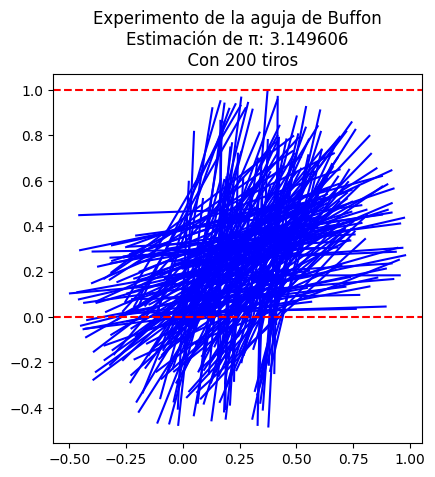

In [85]:
# Graficamos las agujas
fig, ax = plt.subplots()
for aguja in agujas:
    (x1, y1), (x2, y2) = aguja
    ax.plot([x1, x2], [y1, y2], 'b-')

# Dibujamos las líneas paralelas
for i in range(int(D) + 1):
    ax.axhline(i, color='r', linestyle='--')

ax.set_aspect('equal', 'box')
plt.title(f"Experimento de la aguja de Buffon\nEstimación de π: {pi_est:.6f}\n  Con {N} tiros")
plt.show()

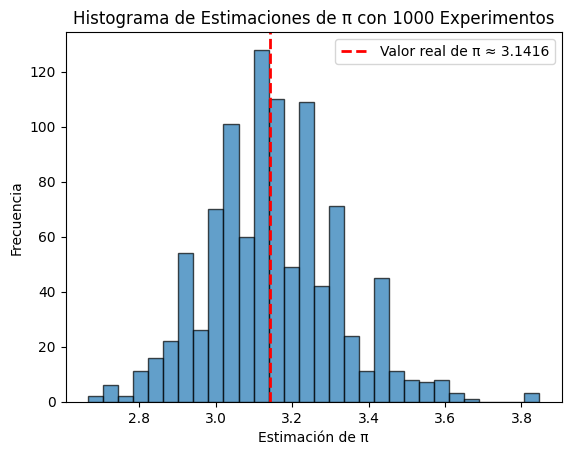

In [86]:
# Agregamos el numero de experimentos para el histograma
num_experiment = 1000

# Realizamos múltiples experimentos
pi_estimates = [buffon_experiment(N, L, D)[0] for _ in range(num_experiment)]

# En caso de que no haya cruces en algún experimento
pi_estimates = [pi for pi in pi_estimates if np.isfinite(pi)]

# Graficamos el histograma de las estimaciones de pi
plt.hist(pi_estimates, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.pi, color='r', linestyle='dashed', linewidth=2, label=f'Valor real de π ≈ {np.pi:.4f}')
plt.title(f"Histograma de Estimaciones de π con {num_experiment} Experimentos")
plt.xlabel("Estimación de π")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [87]:
# Función para calcular las probabilidades
def calcular_probabilidades(N_max, L, D):
    proba = []
    for N in range(1, N_max + 1):
        cruces, _ = buffon_experiment(N, L, D)
        probabilidad = cruces / N
        proba.append(probabilidad)
    return proba

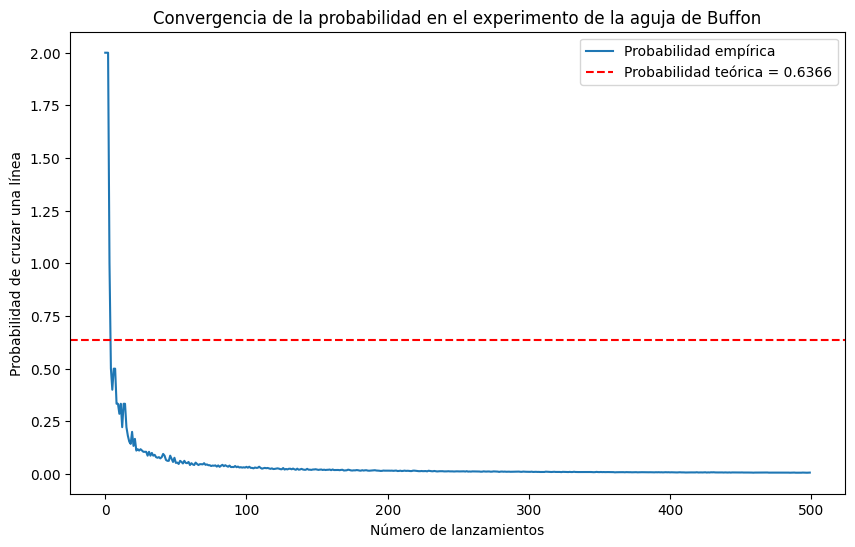

In [91]:
# Graficar la convergencia de la probabilidad
N_max = 500
proba = calcular_probabilidades(N_max, L, D) #Calculamos las probabilidades
plt.figure(figsize=(10, 6))
plt.plot(proba, label='Probabilidad empírica')
plt.axhline(y=(2 * L) / (np.pi * D), color='r', linestyle='--', label=f'Probabilidad teórica = {(2 * L) / (np.pi * D):.4f}') #Con el valor de pi calculamos la probabilidad teorica
plt.xlabel('Número de lanzamientos')
plt.ylabel('Probabilidad de cruzar una línea')
plt.title('Convergencia de la probabilidad en el experimento de la aguja de Buffon')
plt.legend()
plt.show()